In [2]:
import sys
from pathlib import Path

sys.path.insert(0,str(Path(r'C:\Users\Kinga\Desktop\MAGISTERKA\Graph-Vizualisation-Rating-Metric-3').resolve()))

from graph_generating_script import *
from graph_metric_script import *
import matplotlib.pyplot as plt
import igraph as ig
import numpy as np
import pickle

In [49]:
# example_posdf = pd.read_csv(r'pos_dfs\0_circular_layout.csv')
# with open('graph_objects\graph_0.pkl', 'rb') as f:
#     G = pickle.load(f)

In [50]:
# zrobic df gdzie jest: graph_id+layout(czyli nazwa pliku), score, i oliczone wartosci kazdego z komponentow

# MAIN LOOP

In [3]:
annotations = pd.read_excel('ER_annotations_scores.xlsx')

In [4]:
import os 
posdf_dir = 'pos_dfs'
graph_dir = 'graph_objects'


calculated_components_df = pd.DataFrame(columns=['posdf_id', 'score', 'node_distribution', 'distance_to_borderlines', 'edge_length_sum', 'edge_node_distance_contribution', 'count_edge_crossings','communities_closeness', 'sum_of_angles', 'symmetry'])

# Iterate through files in the posdf_dir
for posdf_file in os.listdir(posdf_dir):
    # reading data
    if posdf_file.endswith('.csv'):
        posdf = pd.read_csv(os.path.join(posdf_dir, posdf_file))
        print(f'Loaded {posdf_file}')

    graph_id = posdf_file.split('_')[0]
    layout = posdf_file.split('.')[0]
    layout = layout[2:]
    score = annotations[annotations['graph_id'] == int(graph_id)][layout].values[0]


    graph_file = 'graph_'+graph_id+'.pkl' 
    with open(os.path.join(graph_dir, graph_file), 'rb') as f:
        G = pickle.load(f)
    components_dict = {
        'posdf_id': posdf_file,
        'score': score,
        'node_distribution': node_distribution(posdf),
        'distance_to_borderlines': distance_to_borderlines(posdf),
        'edge_length_sum': edge_length_sum(G, posdf),
        'edge_node_distance_contribution': edge_node_distance_contribution(G, posdf)[0],
        'count_edge_crossings': count_edge_crossings(G, posdf),
        'communities_closeness' : intra_cluster_distance(G, posdf)['overall_sum'],
        'sum_of_angles' : sum_of_angles(G, posdf),
        'symmetry' : measure_graph_symmetry(G, posdf)
    }
    new_row_df = pd.DataFrame([components_dict])
    calculated_components_df = pd.concat([calculated_components_df, new_row_df], ignore_index=True)

Loaded 0_graphopt.csv
Loaded 0_kamada_kawai.csv
Loaded 0_lgl.csv
Loaded 0_random.csv
Loaded 1_graphopt.csv
Loaded 1_kamada_kawai.csv
Loaded 1_lgl.csv
Loaded 1_random.csv
Loaded 2_graphopt.csv
Loaded 2_kamada_kawai.csv
Loaded 2_lgl.csv
Loaded 2_random.csv
Loaded 3_graphopt.csv
Loaded 3_kamada_kawai.csv
Loaded 3_lgl.csv
Loaded 3_random.csv
Loaded 4_graphopt.csv
Loaded 4_kamada_kawai.csv
Loaded 4_lgl.csv
Loaded 4_random.csv
Loaded 5_graphopt.csv
Loaded 5_kamada_kawai.csv
Loaded 5_lgl.csv
Loaded 5_random.csv
Loaded 6_graphopt.csv
Loaded 6_kamada_kawai.csv
Loaded 6_lgl.csv
Loaded 6_random.csv


In [5]:
calculated_components_df.head(10)

,posdf_id,score,node_distribution,distance_to_borderlines,edge_length_sum,edge_node_distance_contribution,count_edge_crossings,communities_closeness,sum_of_angles,symmetry
0,0_graphopt.csv,4.0,0.017823,2.973,4.601165e+04,4.121617e-01,16,5.313726e+02,8.416345,7.536455e-03
1,0_kamada_kawai.csv,5.0,38.658896,10028.461,5.444730e+00,1.395340e+02,0,1.176081e+01,8.798310,9.468607e-01
2,0_lgl.csv,1.0,0.018802,0.000,1.908408e+13,1.612924e+08,17,9.333996e+06,7.229842,1.396579e-11
3,0_random.csv,2.0,444.717155,214.140,6.326544e+00,3.535985e+06,16,5.590635e+00,6.531535,9.721120e-01
4,1_graphopt.csv,3.5,0.015294,16130.329,2.782025e+04,1.529908e+00,2,3.213147e+02,5.765921,4.085497e-03
5,1_kamada_kawai.csv,5.0,27.743358,10021.227,4.606446e+00,9.286165e+01,0,9.448375e+00,5.628358,9.261612e-01
6,1_lgl.csv,1.0,0.019238,0.000,1.141551e+13,5.030721e-01,4,5.391508e+06,5.946490,3.020658e-11
7,1_random.csv,2.0,398.944526,115.396,4.130114e+00,5.815566e+05,6,5.701818e+00,5.376684,9.766955e-01
8,2_graphopt.csv,3.0,0.026192,0.744,7.087529e+04,2.663838e+01,18,9.364005e+02,8.682416,2.476893e-03
9,2_kamada_kawai.csv,5.0,87.367835,10039.615,3.695202e+00,3.269665e+02,1,2.049240e+01,12.028514,9.275585e-01


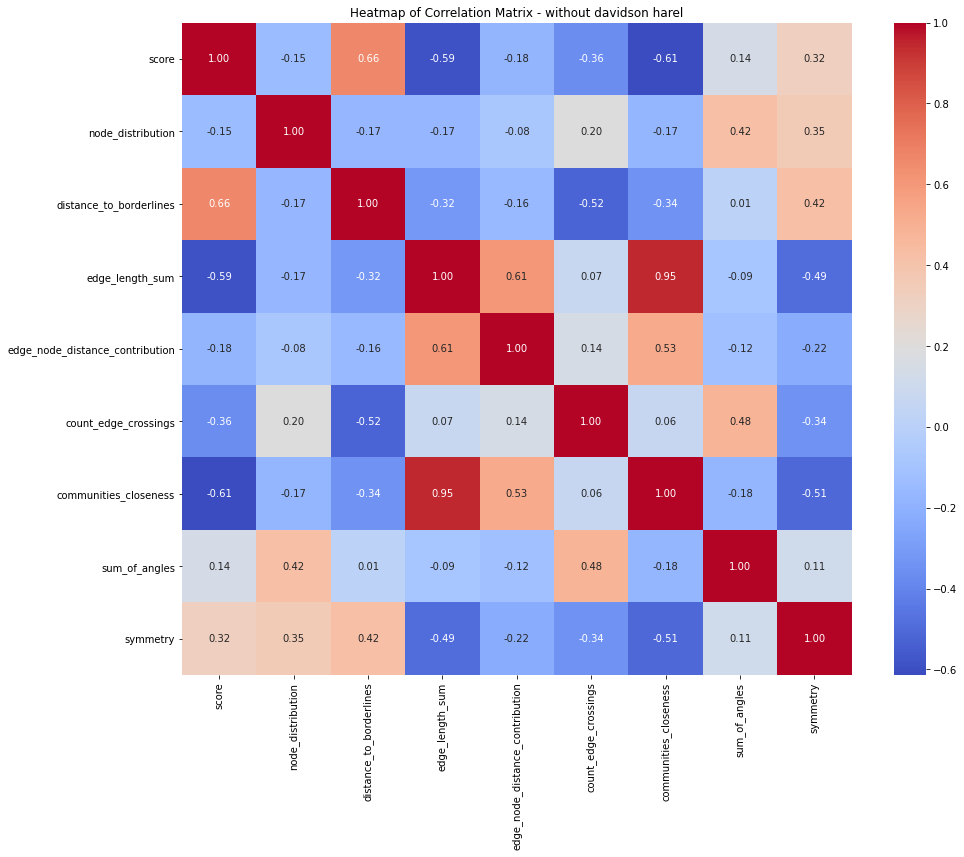

In [9]:
# Calculate the correlation matrix
# WITHOUT davidson harel
import seaborn as sns

calculated_components_df_numeric = calculated_components_df.drop(columns=['posdf_id'])
correlation_matrix = calculated_components_df_numeric.corr()

# Generate a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix - without davidson harel')
plt.show()

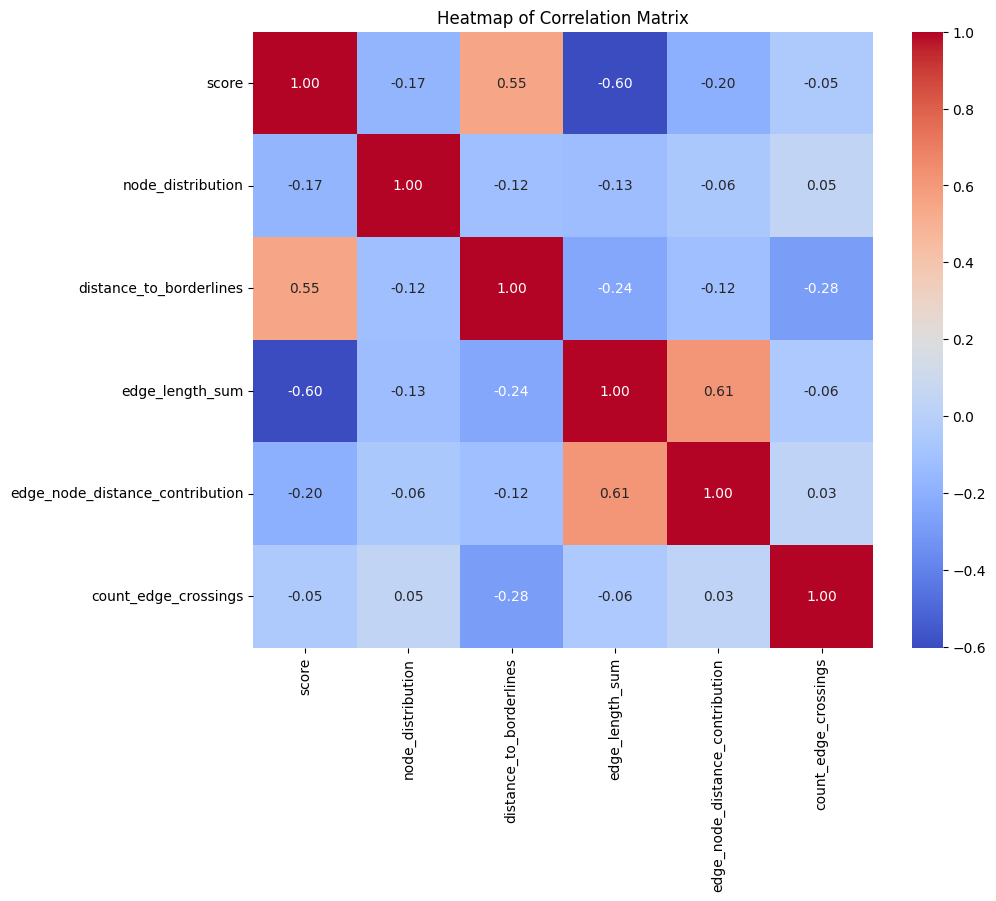

In [5]:
# Calculate the correlation matrix
# with davidson harel
import seaborn as sns

calculated_components_df_numeric = calculated_components_df.drop(columns=['posdf_id'])
correlation_matrix = calculated_components_df_numeric.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()